In [ ]:
!pip install pyspark

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Economic Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

24/11/16 15:59:38 WARN Utils: Your hostname, devopsvm resolves to a loopback address: 127.0.1.1; using 192.168.0.14 instead (on interface enp0s3)
24/11/16 15:59:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/16 15:59:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/11/16 15:59:45 WARN Utils: Service 'SparkUI' could not bind on port 4050. Attempting port 4051.


In [3]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/user5/hadoop/mos_data/MOCK_DATA.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df.show(5)

+-------+----------+-------------------+-----+-------+--------+----------+-------+--------------+
|tradeno| tradedate|          tradetime|secid|  price|quantity|     value|buysell|tradingsession|
+-------+----------+-------------------+-----+-------+--------+----------+-------+--------------+
|      1|06.03.2008|2024-11-16 09:39:00| ROSN|3132.13|    1766|5531341.58|      B|             1|
|      2|15.03.2014|2024-11-16 22:01:00| ROSN|1376.52|    1202|1654577.04|      B|             1|
|      3|18.01.2015|2024-11-16 16:38:00| ROSN| 147.99|    1389| 205558.11|      S|             1|
|      4|03.05.2002|2024-11-16 21:41:00| ROSN|1322.87|    1077|1424730.99|      S|             1|
|      5|30.07.2012|2024-11-16 00:18:00| ROSN|4064.77|     389|1581195.53|      S|             1|
+-------+----------+-------------------+-----+-------+--------+----------+-------+--------------+
only showing top 5 rows



In [4]:
# convert to pandas dataframe
pandas_df = df.toPandas()
pandas_df.head()

,tradeno,tradedate,tradetime,secid,price,quantity,value,buysell,tradingsession
0,1,06.03.2008,2024-11-16 09:39:00,ROSN,3132.13,1766,5531341.58,B,1
1,2,15.03.2014,2024-11-16 22:01:00,ROSN,1376.52,1202,1654577.04,B,1
2,3,18.01.2015,2024-11-16 16:38:00,ROSN,147.99,1389,205558.11,S,1
3,4,03.05.2002,2024-11-16 21:41:00,ROSN,1322.87,1077,1424730.99,S,1
4,5,30.07.2012,2024-11-16 00:18:00,ROSN,4064.77,389,1581195.53,S,1


In [5]:
# checking data types
pandas_df.dtypes

tradeno                    int32
tradedate                 object
tradetime         datetime64[ns]
secid                     object
price                    float64
quantity                   int32
value                    float64
buysell                   object
tradingsession             int32
dtype: object

In [6]:
# checking statistical indicators
pandas_df.describe()

,tradeno,tradetime,price,quantity,value,tradingsession
count,1000.000000,1000,1000.0000,1000.000000,1.000000e+03,1000.0
mean,500.500000,2024-11-16 12:04:43.199999744,2453.4957,1001.847000,2.430336e+06,1.0
min,1.000000,2024-11-16 00:00:00,5.6600,6.000000,4.829400e+02,1.0
25%,250.750000,2024-11-16 06:14:45,1246.6125,506.250000,6.728711e+05,1.0
50%,500.500000,2024-11-16 12:24:30,2354.2550,1000.000000,1.824269e+06,1.0
75%,750.250000,2024-11-16 17:53:15,3712.6625,1524.000000,3.662500e+06,1.0
max,1000.000000,2024-11-16 23:58:00,4999.5800,1999.000000,9.328699e+06,1.0
std,288.819436,NaN,1445.0778,580.770816,2.151440e+06,0.0


In [7]:
# Changing data type for tradedate
pandas_df['tradedate'] = pd.to_datetime(pandas_df['tradedate'], format = 'mixed')

In [8]:
#checking data type
pandas_df.dtypes

tradeno                    int32
tradedate         datetime64[ns]
tradetime         datetime64[ns]
secid                     object
price                    float64
quantity                   int32
value                    float64
buysell                   object
tradingsession             int32
dtype: object

In [9]:
# remove date from tradetime
pandas_df['tradetime'] = pandas_df['tradetime'].dt.strftime('%H:%M:%S')

In [10]:
# checking dataframe
pandas_df

,tradeno,tradedate,tradetime,secid,price,quantity,value,buysell,tradingsession
0,1,2008-06-03,09:39:00,ROSN,3132.13,1766,5531341.58,B,1
1,2,2014-03-15,22:01:00,ROSN,1376.52,1202,1654577.04,B,1
2,3,2015-01-18,16:38:00,ROSN,147.99,1389,205558.11,S,1
3,4,2002-03-05,21:41:00,ROSN,1322.87,1077,1424730.99,S,1
4,5,2012-07-30,00:18:00,ROSN,4064.77,389,1581195.53,S,1
...,...,...,...,...,...,...,...,...,...
995,996,2007-09-18,18:46:00,ROSN,4817.57,1692,8151328.44,S,1
996,997,2009-02-13,21:15:00,ROSN,3401.04,982,3339821.28,B,1
997,998,2000-05-16,02:07:00,ROSN,1484.54,1062,1576581.48,S,1
998,999,2004-01-04,05:39:00,ROSN,3053.31,1289,3935716.59,S,1


In [11]:
# filtering table data for 3 years
filtered_df = pandas_df[pandas_df['tradedate'].between('2021-01-01', '2024-12-31')]
filtered_df.head()

,tradeno,tradedate,tradetime,secid,price,quantity,value,buysell,tradingsession
5,6,2022-06-17,05:38:00,ROSN,1399.96,1368,1915145.28,S,1
8,9,2022-03-17,18:53:00,ROSN,1710.32,528,903048.96,B,1
13,14,2022-08-10,03:05:00,ROSN,864.96,1716,1484271.36,B,1
23,24,2022-11-07,08:50:00,ROSN,2106.06,1110,2337726.60,S,1
25,26,2021-01-25,19:38:00,ROSN,1910.38,1394,2663069.72,S,1


In [12]:
# check median for filtered data
median_value = filtered_df['value'].median()
median_value

2287718.24

In [13]:
# check mean for filtered data
mean_value = round(filtered_df['value'].mean(), 2)
mean_value

2809898.98

In [14]:
# check max for filtered data
max_value = filtered_df['value'].max()
max_value 

9328699.2

In [15]:
# check min for filtered data
min_value = filtered_df['value'].min()
min_value 

10097.56

In [16]:
# create new data witn tradedate and value only
new_data = filtered_df[['tradedate','value']]
new_data

,tradedate,value
5,2022-06-17,1915145.28
8,2022-03-17,903048.96
13,2022-08-10,1484271.36
23,2022-11-07,2337726.60
25,2021-01-25,2663069.72
...,...,...
962,2021-11-13,4277849.05
970,2022-11-11,462744.90
973,2021-08-16,728157.48
974,2022-06-14,2825947.20


In [17]:
# grouping values median by date
new_data = new_data.groupby('tradedate').median()

In [18]:
# check data
new_data

,value
tradedate,
2021-01-03,3211323.12
2021-01-12,2628284.10
2021-01-20,2793578.31
2021-01-25,2663069.72
2021-02-18,9076891.40
...,...
2023-10-02,4452122.46
2023-10-10,4829355.64
2023-11-19,2733871.86


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


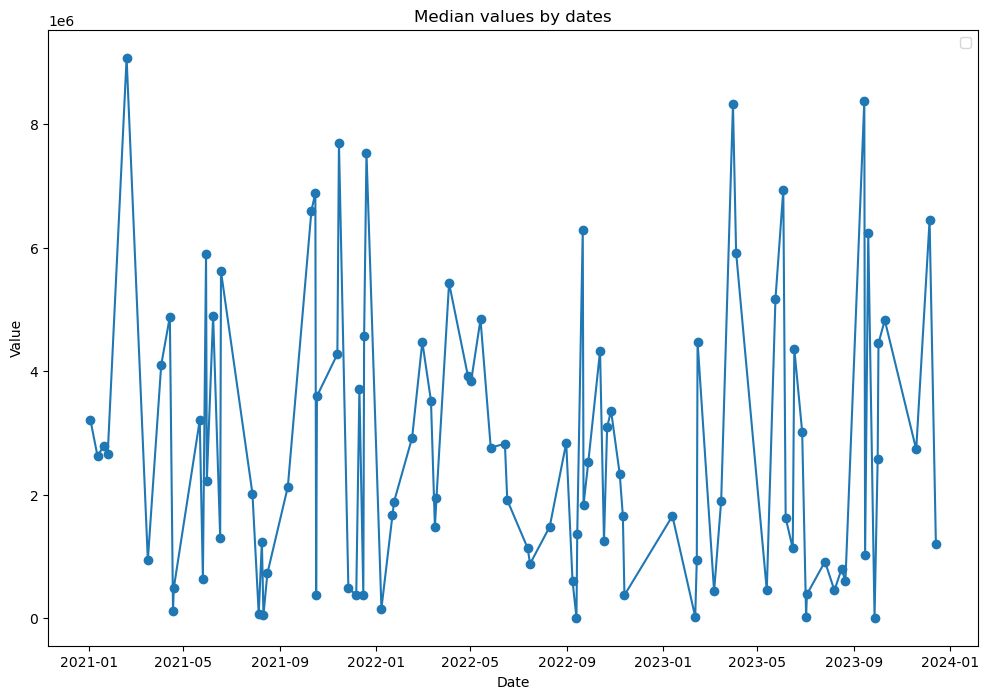

In [20]:
# create chart
plt.figure(figsize=(12, 8))

plt.plot(new_data.index, new_data['value'], marker='o')

plt.title('Median values by dates')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [21]:
# let`s do the same for years
new_data = filtered_df[['tradedate','value']]
#convert tradedate: dates into years
new_data['tradedate'] = new_data['tradedate'].dt.year
new_data = new_data.groupby('tradedate').median()
new_data

/tmp/ipykernel_8765/2664701745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tradedate'] = new_data['tradedate'].dt.year


,value
tradedate,
2021,2645676.91
2022,2401295.62
2023,1829687.15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


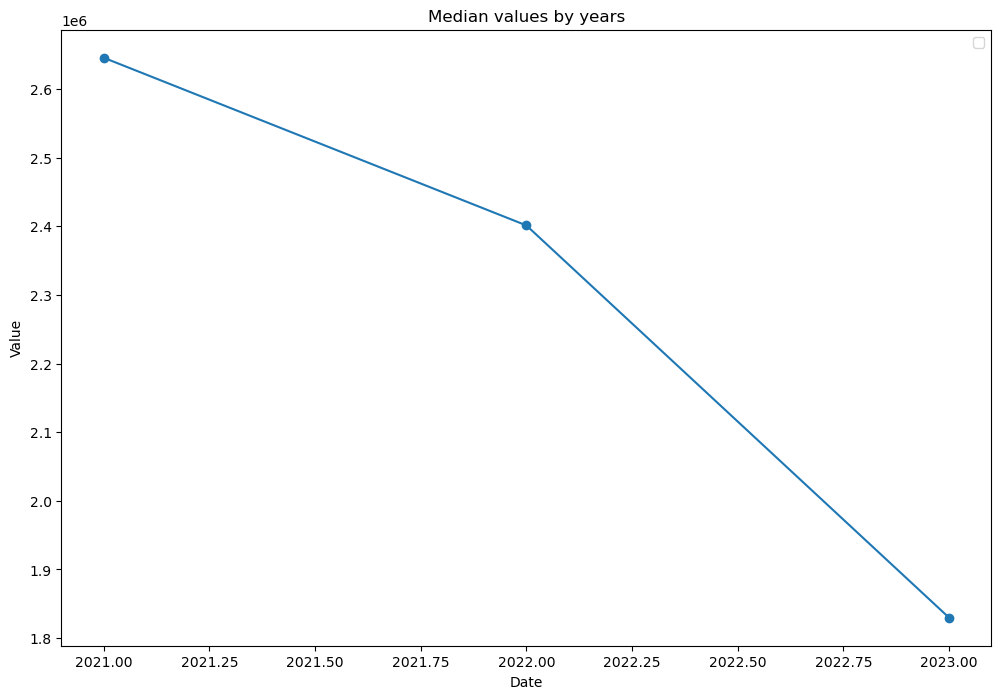

In [22]:
#create chart
plt.figure(figsize=(12, 8))

plt.plot(new_data.index, new_data['value'], marker='o')

plt.title('Median values by years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [30]:
# let`s do the same for all years
new_data = pandas_df[['tradedate','value']]
new_data['tradedate'] = new_data['tradedate'].dt.year
new_data = new_data.groupby('tradedate').median()
new_data

/tmp/ipykernel_8765/3582821284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tradedate'] = new_data['tradedate'].dt.year


,value
tradedate,
2000,1685894.160
2001,2175643.800
2002,1296009.245
2003,2217854.840
2004,2125087.330
2005,1497605.360
2006,2111675.660
2007,1791608.800
2008,1663286.900


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


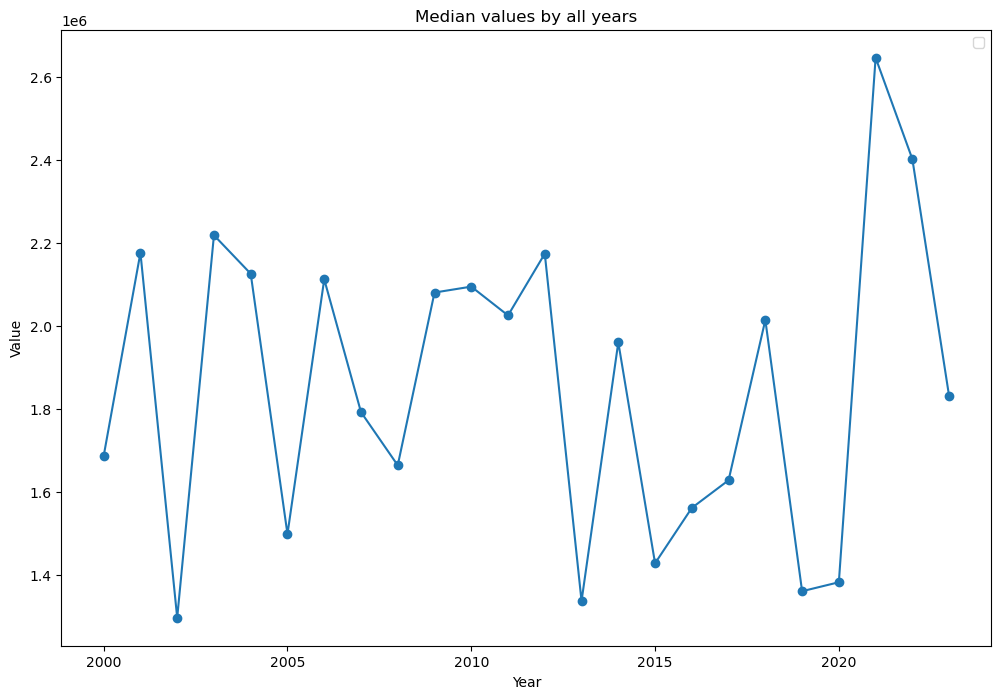

In [31]:
plt.figure(figsize=(12, 8))

plt.plot(new_data.index, new_data['value'], marker='o')

plt.title('Median values by all years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [35]:
# let`s do the same for max values
new_data = pandas_df[['tradedate','value']]
new_data['tradedate'] = new_data['tradedate'].dt.year
new_data = new_data.groupby('tradedate').max()
new_data

/tmp/ipykernel_8765/1243668336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tradedate'] = new_data['tradedate'].dt.year


,value
tradedate,
2000,9130773.40
2001,8181116.96
2002,6765554.88
2003,8551458.63
2004,8317859.40
2005,8588625.99
2006,7801267.00
2007,8151328.44
2008,6253055.10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


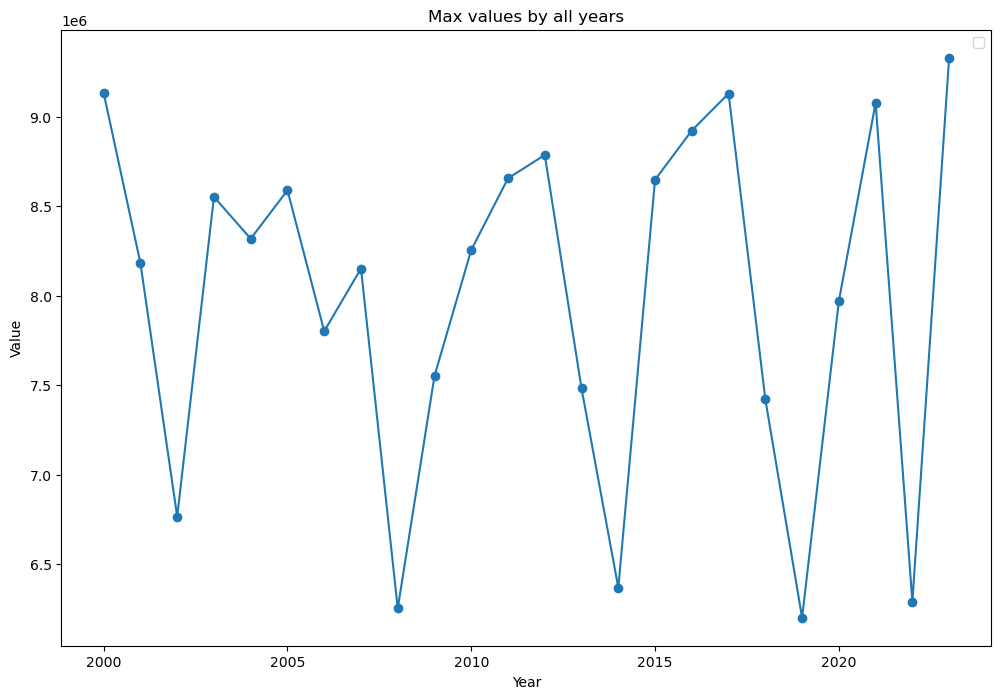

In [29]:
plt.figure(figsize=(12, 8))

plt.plot(new_data.index, new_data['value'], marker='o')

plt.title('Max values by all years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [36]:
# Преобразование Pandas DataFrame обратно в PySpark DataFrame
new_data = spark.createDataFrame(new_data)


In [37]:
# Путь в HDFS для сохранения
file_path_hdfs = "hdfs://localhost:9000/user5/hadoop/mos_data/new_data_max.csv"

# Сохранение DataFrame в формате CSV в HDFS
new_data.write.csv(file_path_hdfs, header=True, mode='overwrite')

Изменение прав доступа к каталогу:

Используйте команду hdfs dfs -chmod для изменения прав доступа и разрешения записи для нужного пользователя:
hdfs dfs -chmod 777 /user2/hadoop/economic_data